In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

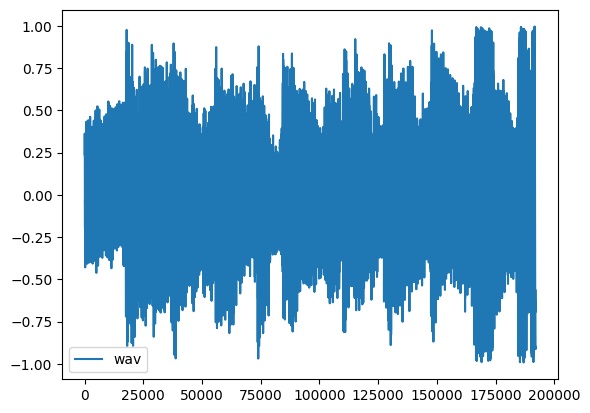

In [2]:
AUDIO_PATH = '/home/yytung/projects/test_audiobox/gao.wav'
wav, sr = sf.read(AUDIO_PATH)
wav = np.mean(wav, axis=1)
wav = wav[sr*15:sr*19]
ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Panning 

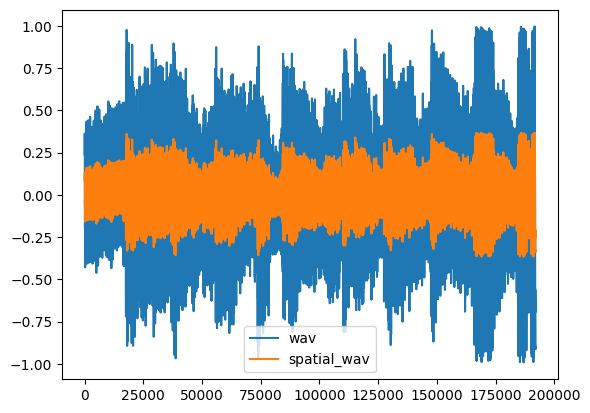

In [6]:
from diffFx_pytorch.processors.spatial  import StereoPanning      
SPATIAL_DSP_PARAMS = {
    'pan': 0.7
}

Processor = StereoPanning(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
spatial_wav = Processor(test_wav, None, SPATIAL_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=spatial_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(spatial_wav.squeeze()[0, ...].cpu().numpy(),      label='spatial_wav')
plt.legend()

## Widener

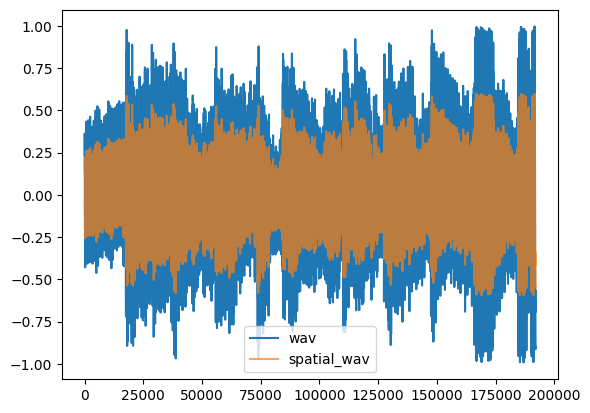

In [13]:
from diffFx_pytorch.processors.spatial  import StereoWidener      
SPATIAL_DSP_PARAMS = {
    'width': 0.7
}

Processor = StereoWidener(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav = test_wav.repeat(1, 2, 1)
spatial_wav = Processor(test_wav, None, SPATIAL_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=spatial_wav.squeeze().cpu().numpy() * 0.6, rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(spatial_wav.squeeze()[0, ...].cpu().numpy(),  alpha=0.7,label='spatial_wav')
plt.legend()

## Imager

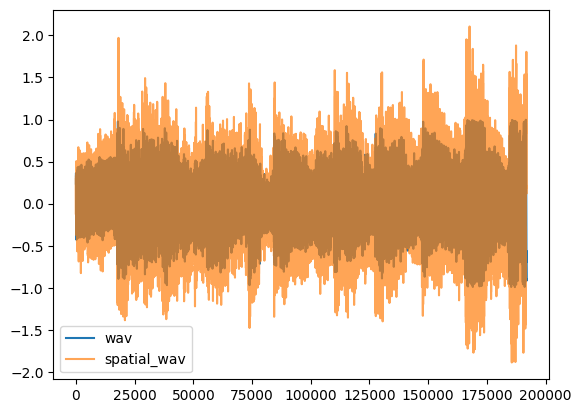

In [27]:
from diffFx_pytorch.processors.spatial  import MultiBandStereoWidener  
SPATIAL_DSP_PARAMS = {
    'band0_width': 0.3,
    'band1_width': 0.2,
    'band2_width': 0.1,
    'crossover0_freq': 100.0,
    'crossover1_freq': 2000.0
}

Processor = MultiBandStereoWidener(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav = test_wav.repeat(1, 2, 1)
spatial_wav = Processor(test_wav, None, SPATIAL_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=spatial_wav.squeeze().cpu().numpy() * 0.3, rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(spatial_wav.squeeze()[0, ...].cpu().numpy(),  alpha=0.7,label='spatial_wav')
plt.legend()

## Enhancer

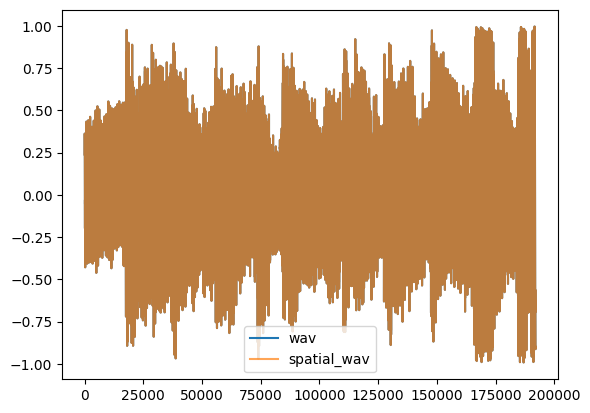

In [31]:
from diffFx_pytorch.processors.spatial  import StereoEnhancer   
SPATIAL_DSP_PARAMS = {
    'delay_ms': 10.0,
    'width': 1.0
}

Processor = StereoEnhancer(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav = test_wav.repeat(1, 2, 1)
spatial_wav = Processor(test_wav, None, SPATIAL_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=spatial_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(spatial_wav.squeeze()[0, ...].cpu().numpy(),  alpha=0.7,label='spatial_wav')
plt.legend()